First three natural frequencies (Hz):
[  8.38190299  52.52859678 147.08369103]


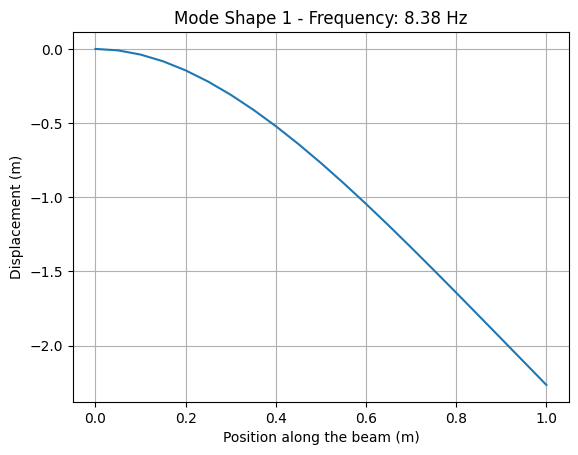

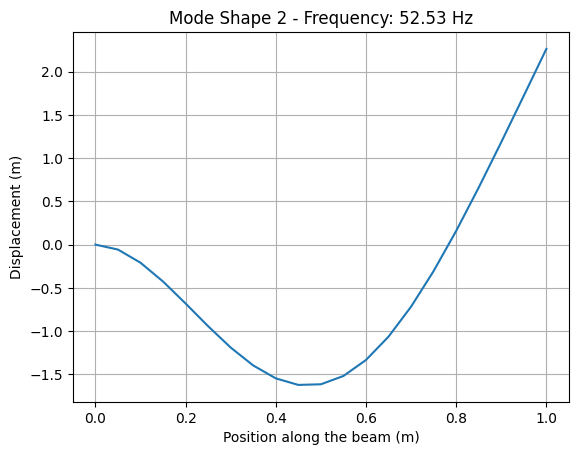

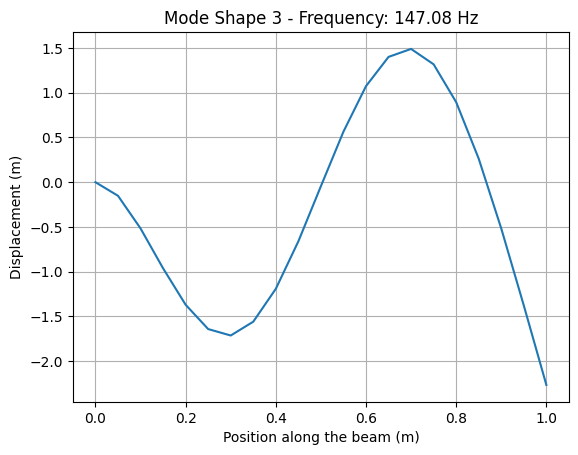

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

# Parameters
L = 1.0          # Length of the beam (m)
E = 210e9        # Young's modulus (Pa)
rho = 7800       # Density (kg/m^3)
b = 0.01         # Width of the beam (m)
h = 0.01         # Height of the beam (m)
A = b * h        # Cross-sectional area (m^2)
I = (b * h**3) / 12  # Moment of inertia (m^4)

# Number of elements and nodes
num_elements = 20
num_nodes = num_elements + 1

# Element length
Le = L / num_elements

# Global stiffness and mass matrices
K = np.zeros((2*num_nodes, 2*num_nodes))
M = np.zeros((2*num_nodes, 2*num_nodes))

# Element stiffness and mass matrices
for i in range(num_elements):
    Ke = (E * I / Le**3) * np.array([
        [12, 6*Le, -12, 6*Le],
        [6*Le, 4*Le**2, -6*Le, 2*Le**2],
        [-12, -6*Le, 12, -6*Le],
        [6*Le, 2*Le**2, -6*Le, 4*Le**2]
    ])

    Me = (rho * A * Le / 420) * np.array([
        [156, 22*Le, 54, -13*Le],
        [22*Le, 4*Le**2, 13*Le, -3*Le**2],
        [54, 13*Le, 156, -22*Le],
        [-13*Le, -3*Le**2, -22*Le, 4*Le**2]
    ])

    # Assemble global matrices
    idx = slice(2*i, 2*i+4)
    K[idx, idx] += Ke
    M[idx, idx] += Me

# Boundary conditions (fixed at node 1)
K = K[2:, 2:]
M = M[2:, 2:]

# Solve the eigenvalue problem
eigenvalues, eigenvectors = eigh(K, M)
natural_frequencies = np.sqrt(eigenvalues) / (2 * np.pi)

# Sort natural frequencies and corresponding mode shapes
sorted_indices = np.argsort(natural_frequencies)
natural_frequencies = natural_frequencies[sorted_indices]
mode_shapes = eigenvectors[:, sorted_indices]

# Display the first three natural frequencies
print('First three natural frequencies (Hz):')
print(natural_frequencies[:3])

# Plot mode shapes
x = np.linspace(0, L, num_nodes)
for i in range(3):
    plt.figure()
    mode_shape = np.concatenate(([0], mode_shapes[::2, i]))  # Include the fixed end
    plt.plot(x, mode_shape)
    plt.title(f'Mode Shape {i+1} - Frequency: {natural_frequencies[i]:.2f} Hz')
    plt.xlabel('Position along the beam (m)')
    plt.ylabel('Displacement (m)')
    plt.grid(True)
    plt.show()
